# Decision Tree
This notebook explores the Decision tree algorithm.
You should fill out the <span style="color:purple">**3 dots ...**</span> with the corresponding lines of codes. <br>

# Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

# Initialize a decision tree classifier of depth 2
tree_clf = DecisionTreeClassifier(max_depth= 2)
# Fit the model to the data 
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2)

**This code example generates Figure 6–1. Iris Decision Tree:**

In [2]:
from sklearn.tree import export_graphviz
import subprocess
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",  # In fact it's a dot file
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
subprocess.run(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png'], check=True)

CompletedProcess(args=['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png'], returncode=0)

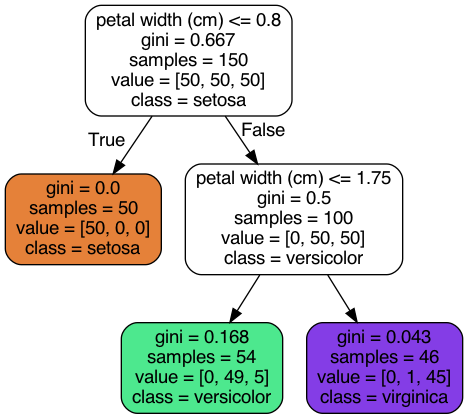

In [3]:
from IPython.display import Image,display
from matplotlib import pyplot as plt
img = Image(filename='iris_tree.png')
display(img)

# Making Predictions

Extract the tree structure via the `tree_` attribute:

For more information, check out this class's documentation:
`import sklearn
help(sklearn.tree._tree.Tree)`

In [4]:
import numpy as np

tree = tree_clf.tree_

print('Total number of nodes:', tree.node_count)
print('Max depth :', tree.max_depth)
print('Number of classes:', tree.max_n_classes)
print('Number of features, i.e., the independent variables:', tree.n_features)
print('Impurity (i.e., the value of the splitting criterion) at node i=1 is :', tree.impurity[1])
print('Children of the root node:', tree.children_left[0], 'and', tree.children_right[0])
# a leaf node is when the number of its right children is equal to the number of its left children
# Create the boolean condition the number of its right children is equal to the number of its left children
is_leaf = (tree.children_left == tree.children_right)
print('Leaf nodes are:', np.arange(tree.node_count)[is_leaf])
# Non-leaf nodes are called split nodes. 
# The feature they split is available via the 'feature' array. Values for leaf nodes should be ignored.
print('Feature or Split nodes per node are:', tree.feature)
# A node is split based on a feature (a split node) and a threshold to this feature, i.e., x1<= threshold
print('Thresholds of features:', tree.threshold)
print('Number of data points per class at each node:', tree.value)

Total number of nodes: 5
Max depth : 2
Number of classes: 3
Number of features, i.e., the independent variables: 2
Impurity (i.e., the value of the splitting criterion) at node i=1 is : 0.0
Children of the root node: 1 and 2
Leaf nodes are: [1 3 4]
Feature or Split nodes per node are: [ 1 -2  1 -2 -2]
Thresholds of features: [ 0.80000001 -2.          1.75       -2.         -2.        ]
Number of data points per class at each node: [[[50. 50. 50.]]

 [[50.  0.  0.]]

 [[ 0. 50. 50.]]

 [[ 0. 49.  5.]]

 [[ 0.  1. 45.]]]


In [5]:
import sklearn

In [6]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

# Estimating Class Probabilities

In [7]:
X_new = [[5, 1.5], [2, 0.5]]

In [8]:
# Predict the probabilities of each class on the new data X_new
display(tree_clf.predict_proba(X_new))

array([[0.        , 0.90740741, 0.09259259],
       [1.        , 0.        , 0.        ]])

In [9]:
# Predict the class of the new data X_new
display(tree_clf.predict(X_new))

array([1, 0])

# Regularization Hyperparameters

In [10]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

# Initialize and fit 2 decision tree classifiers:
# one with the default hyperparameters and the other with the min nbr of samples = 5
tree_clf1 = DecisionTreeClassifier()
tree_clf1.fit(X_moons, y_moons)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5)

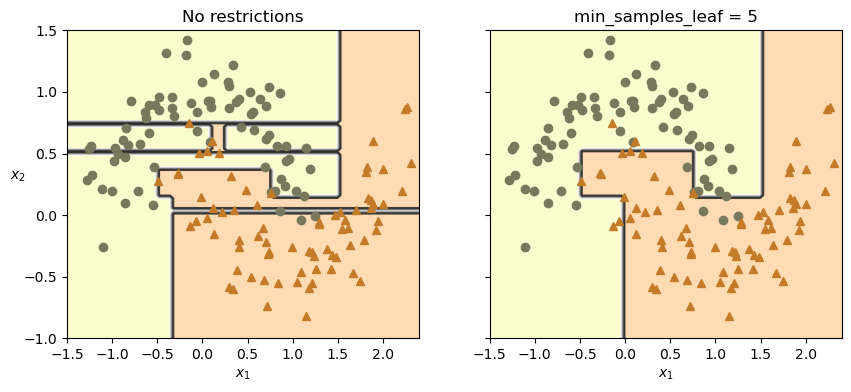

In [11]:
import matplotlib.pyplot as plt
from utils import plot_decision_boundary_for_decision_tree

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary_for_decision_tree(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary_for_decision_tree(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")

plt.show()

In [12]:
# Testing both models on new test data 
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
score1 = tree_clf1.score(X_moons_test, y_moons_test)
score2 = tree_clf2.score(X_moons_test, y_moons_test)
print("default model's performance:", score1)
print("default model's performance:", score2)

default model's performance: 0.894
default model's performance: 0.92


# Regression

In [13]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Generating quadratic continuous data
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

# Initialize a regression tree with max depth = 2
tree_reg = DecisionTreeRegressor(max_depth=2)
# Fit the model
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2)

In [14]:
# extra code – we've already seen how to use export_graphviz()
export_graphviz(
    tree_reg,
    out_file=str("regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

In [15]:
# Initialize another regression tree with max depth = 3
tree_reg2 = DecisionTreeRegressor(max_depth=3)
# Fit the model
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3)

In [16]:
# Print the 1st tree thresholds of the features (i.e., feature x <= threshold)
thresh_1 = tree_reg.tree_.threshold
thresh_1

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [17]:
# Print the 2nd tree thresholds of the features (i.e., feature x <= threshold)
thresh_2 = tree_reg2.tree_.threshold
thresh_2

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

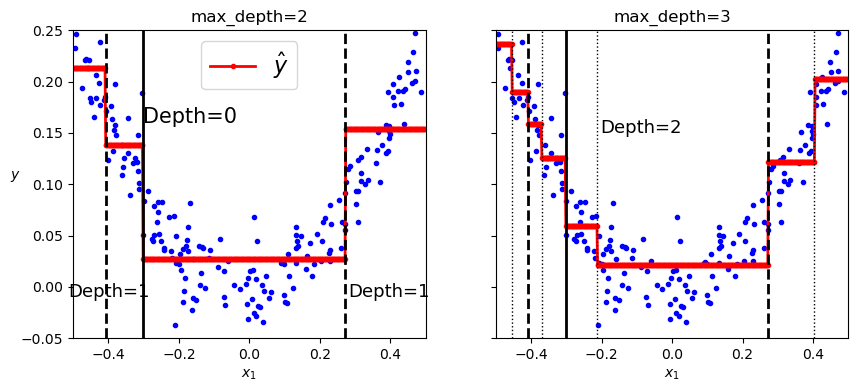

In [18]:
# Let us plot the decision boundaries
from utils import plot_regression_predictions_of_trees
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions_of_trees(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions_of_trees(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

Regression Trees are prone to overfitting just like classification trees. 
Here we will fit 2 decision trees one with default hyperparameter and the other with one regularization and check their performance.

In [19]:
# Initialize a decision tree with default hyperparameters and a random state = 42
tree_reg1 = DecisionTreeRegressor(random_state=42)
# Fit the model to the previously generated quadratic dataset
tree_reg1.fit(X_quad, y_quad)
# Initialize another decision tree with the mini number of data points in the leaf node = 10 and a random state = 42
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
# Fit the model
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
# Predict on x1 using the first model
y_pred1 = tree_reg1.predict(x1)
# Predict on x1 using the second model
y_pred2 = tree_reg2.predict(x1)

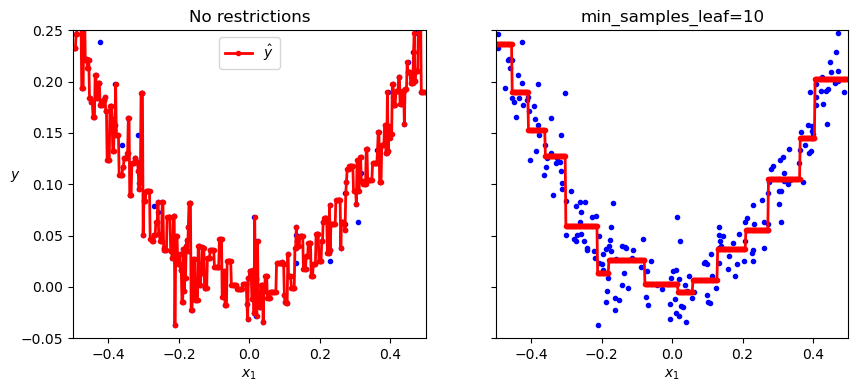

In [20]:
# Let us plot the decision boundaries of both models
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

plt.show()

# Sensitivity to axis orientation

Rotating the dataset leads to completely different decision boundaries.

To test this theory, we will rotate the dataset using PCA and check the new decision boundaries.

First, we will train a decision tree classifier without any transformation on the data and plot the decision boundaries.

In [21]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

# # Initialize a decision tree classifier of depth 2 and random_state = 42
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
# # Fit the model to the data 
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

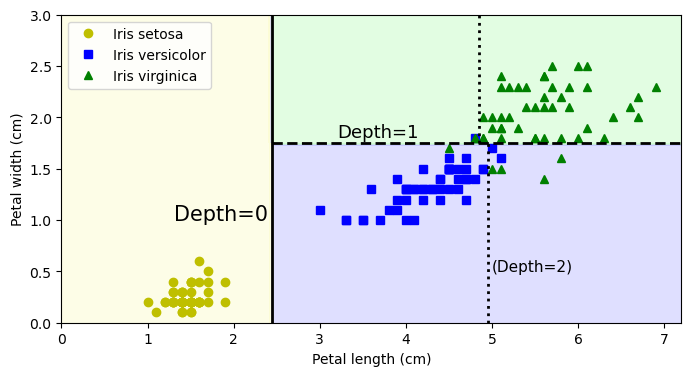

In [22]:
# Plotting the decision boundaries
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Intialize a pipeline with standard scaler and a PCA
pca_pipeline = make_pipeline(StandardScaler(), PCA())
# Fit the pipeline to the data and transform the training features
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
# Initialize a decision tree of depth 2 and a random state = 42
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
# fit the tree 
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

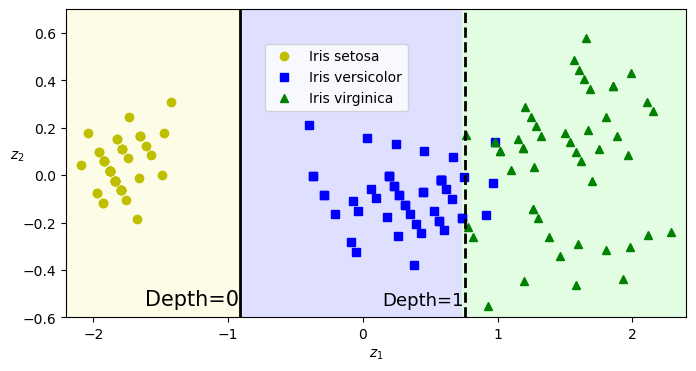

In [24]:
# Plotting the decision boundaries
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))

plt.show()

# Decision Trees Have High Variance

Any small changes in the dataset (such as a rotation) may produce a very different Decision Tree.

Now let's show that training the same model on the same data may produce a very different model every time.

The reason behind is that the CART training algorithm used by Scikit-Learn is stochastic. 

To show this, we will set `random_state` to a different value than earlier:

In [25]:
# Initialize a decision tree classifier with max depth = 2 and a random_state = 40
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
# Fit the tree
tree_clf_tweaked.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

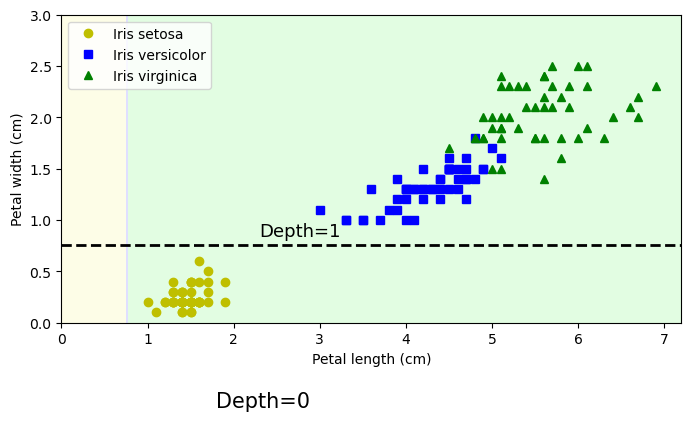

In [26]:
# Plotting the decision boundaries
plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

# Training and Finetuning a decision tree classifier on the moons dataset

In [27]:
# Generating a moons dataset of 10 000 data points
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [28]:
from sklearn.model_selection import train_test_split
# Split it into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV
# Initialize the disctionary of 3 hyperparameters: 
# the maximum number of leaf nodes, 
# the maximum depth,
# and the minimum number of samples required to split an internal node
params = {
    "max_leaf_nodes": [5, 10, 20, 30, None],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10, 20]
}
# Use grid search with a 3-fold cross-validation to find good hyperparameter values for the decision tree model.
# ste the random state to 42
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=params, cv = 3)
# Fit the grid search
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_leaf_nodes': [5, 10, 20, 30, None],
                         'min_samples_split': [2, 5, 10, 20]})

In [30]:
# Print the best estimator
best_model = grid_search_cv.best_estimator_
print(best_model)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, random_state=42)



Test the model on the test set.

**NB:** <br>
By default, `GridSearchCV` retrains the best estimator found on the whole training set not only on the sub training set.

Remember that with cross validation, the train set is split again into train and validation. When we finish the hyperparameter tuning, we should retrain on the whole training set the model using the optimal hyperparameters found (i.e., the train and validation sets).

If you do not want `GridSearchCV` to retrain the best estimator found on the whole training set, you should set the parameter `refit=False`).

In [31]:
from sklearn.metrics import accuracy_score
# Predict on the test set
y_pred = best_model.predict(X_test)
# Compute the accuracy score
accuracy_score(y_test, y_pred)

0.87

# Implemting several trees to reduce the overfitting effect

This exercise follows the previous one.

We will train 1000 trees, each on a subsample of the training set (only 100 instances instead of 1000), with 100 trees * 100 instances each = 10 000 data points (the whole training set).

Each tree is the best estimator found in the previous exercise.

Then we will predict using all these trees and apply a majority classifier on top to output the final prediction.


Continuing the previous exercise, we generate 1,000 subsets of the training set, each containing 100 instances selected randomly.

In [32]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

# ShuffleSplit returns indices to split data into training and test sets.
# we will use it to return indices of each tree's training set instead.
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)

# Creating the subsampled training datasets: X_mini_train contains 100 data points
# randomly sampled from the original 10 000 data points of the moons dataset
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [33]:
from sklearn.base import clone

# Use the clone class to clone the best estimator from the previous exercise
best_model_from_previous_exercise = clone(best_model)
# Create a list of trees, or what we can call a forest
forest = [ best_model_from_previous_exercise for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    # Fit the tree to the subsample training sets
    tree.fit(X_train, y_train)
    # Predict on X_test
    y_pred = tree.predict(X_test)
    # Compute the accuracy score of the tree on the test set
    score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(score)

# Print the average accuracy over all 1000 trees
average_score = sum(accuracy_scores) / n_trees
print('the average accuracy over all 1000 trees is: ', average_score)

the average accuracy over all 1000 trees is:  0.8700000000000041


The average accuracy is 80.56\% < 85.95\% (the previous score obtained when training one decision tree on the 10 000 data points).

Is this what we want???

It is normal that a tree trained on 100 samples perform worse than one trained on 100 times more data.

Now let us what will be the accuracy when we combine the predictions of all small trees together and select the class that got the highest number of votes (the most frequent class). For that we will use the `mode()` from `SciPy`.

In [34]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    # predict on X_test using every tree in forest
    Y_pred[tree_index] = tree.predict(X_test)

In [35]:
from scipy.stats import mode
# Identify the class of each test data point by computing a majority vote on all the trees' predictions
y_pred_majority_votes, n_votes = mode(Y_pred)
y_pred_majority_votes = y_pred_majority_votes.reshape([-1])

In [36]:
# compute the accuracy score
accuracy = accuracy_score(y_test, y_pred_majority_votes)
print(accuracy)

0.87


As you can see, we have obtained a higher accuracy than the first model (about 0.5 to 1.5% higher). 

As a matter of fact, we have trained a Random Forest classifier!

# Training and Finetuning a decision tree regressor on the quadratic dataset

1. Initialize a decision tree model
2. Use a grid search to find the best hyperparameters corresponding to the precision and recall.
3. Test the best estimator on the x_quad_test

In [37]:
# Generating quadratic continuous data
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
x_quad_test = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_quad_test = x_quad_test ** 2 + 0.025 * np.random.randn(500, 1)

In [38]:
dt_clf = DecisionTreeRegressor(random_state=42)
dt_clf.fit(X_quad, y_quad)

DecisionTreeRegressor(random_state=42)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

tree_reg = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [3, 5, 7, 9, 11],
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring=mse_scorer, verbose=1)

grid_search.fit(X_quad, y_quad)

best_tree_reg = grid_search.best_estimator_

y_quad_pred = best_tree_reg.predict(x_quad_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [40]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

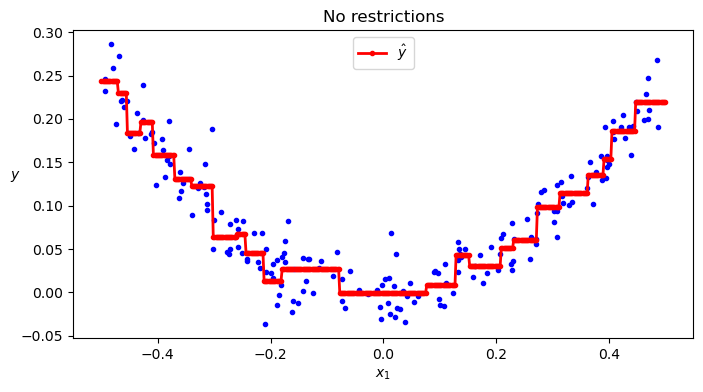

In [41]:
# Plotting the decision boundaries
plt.figure(figsize=(8, 4))
plt.plot(X_quad, y_quad, "b.")
plt.plot(x_quad_test, y_quad_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.show()